<a href="https://colab.research.google.com/github/bahadiryzc/Credit-Cart-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection** 🕵️‍♀️🕵️‍♀️

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

follow-up for the project:

1. Data Collection

2. Data Preparation

4. Train model

5. Analysis/Evaluation




In [4]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

## 1. Data Collection

This data has taken from kaggle. you can reach the data from [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [5]:
# read data
data = pd.read_csv("/content/drive/MyDrive/Credit Card Fraud Detection/creditcard.csv")

In [6]:
# Let's take look at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Data Preparation (EDA)

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Let's check if there is a null value
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.shape

(284807, 31)

there is no `null` value in data. that's good

In [12]:
print(f"there are {data.Class.value_counts()[0]} normal transactions.")
print(f"there are {data.Class.value_counts()[1]} fraud transactions.")

there are 284315 normal transactions.
there are 492 fraud transactions.


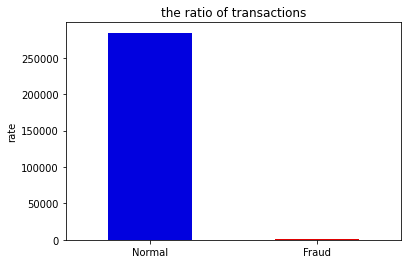

In [13]:
colors = ["#0101DF", "#DF0101"]
label= ["Normal", "Fraud"]
degerler = data.Class.value_counts()
degerler.plot(kind='bar', color= colors)
plt.ylabel("rate")
plt.xticks(range(2), label, rotation=0)
plt.title("the ratio of transactions")
plt.show()

### **approaches to solve unbalanced data**

  * there are 284315 transactions that are not fraud.
    
  * there are 492 transactions that are fraud


#### **as you can see above we have highly unbalanced data, so in** **this type of scenario we should follow these type of steps.**

1. The Metric to be used should not be an Accuracy score. The important thing for us in this scenario is the Recall and precision Value.

 `recall` : It is the ratio of how much of the actually positive values are predicted as positive. ie what is the rate at which a processing model that is actually fraudulent says it is not fraudulent. `Formula = (TP/(TP+FN)).`

 `Precision degeri` : How many of the values we predict as positive actually are positive is the metric that gives this. In other words, our processing model, which is not actually fraudulent, is the scenario it calls fraud. `Formula = (TP/(TP + FP))`

 `F-1 Score` : this value is the harmonic average of the recall and precision value

 `Roc_Auc` : Displays the metric between true positive rate and false positive rate. The scenario where two approaches 1 is the best case scenario.

2. Oversampling or undersampling can be done to reduce the instability of the model.
 
  * `oversampling`: OverSampling generates synthetic data from the minority class until the class distributions are equal. In this method, since synthetic data is produced with the samples of the minority class, the probability of the model being overfitting is high. also, oversampling can be computationally very costly if the dataset has a highly uneven distribution.

  * `undersampling`: Under Sampling aims to rebalance the dataset by removing instances from the class with more instances so that the class distributions are even. One of the disadvantages of this method is that it removes observations that may contribute to projects with insufficient number of observations from the data set.


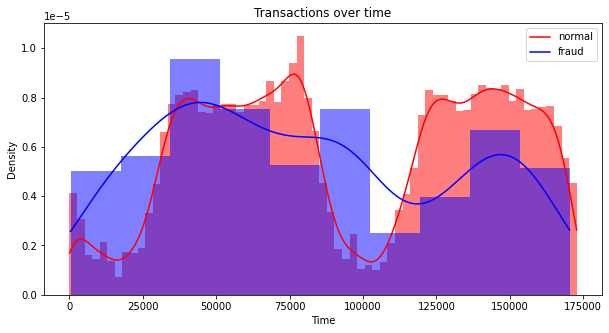

In [14]:
# transactions over time
plt.figure(figsize = (10, 5))
normal = data.loc[data['Class'] == 0]["Time"]
fraud = data.loc[data['Class'] == 1]["Time"]
sns.histplot(normal, kde = True, stat = 'density', linewidth=0, color= 'red', label='Normal')
sns.histplot(fraud, kde = True, stat = 'density', linewidth=0, color='b', label='Fraud')
plt.legend(["normal","fraud"])
plt.title("Transactions over time")
plt.show()

In [15]:
# Let's drop time column
data.drop(columns="Time", inplace = True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
data["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
sc = StandardScaler()
data["Amount"] = sc.fit_transform(data['Amount'].values.reshape (-1,1))

In [19]:
v_values = data.iloc[:, 0:28]
v_values.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


### Let's look at the distributions of the V columns

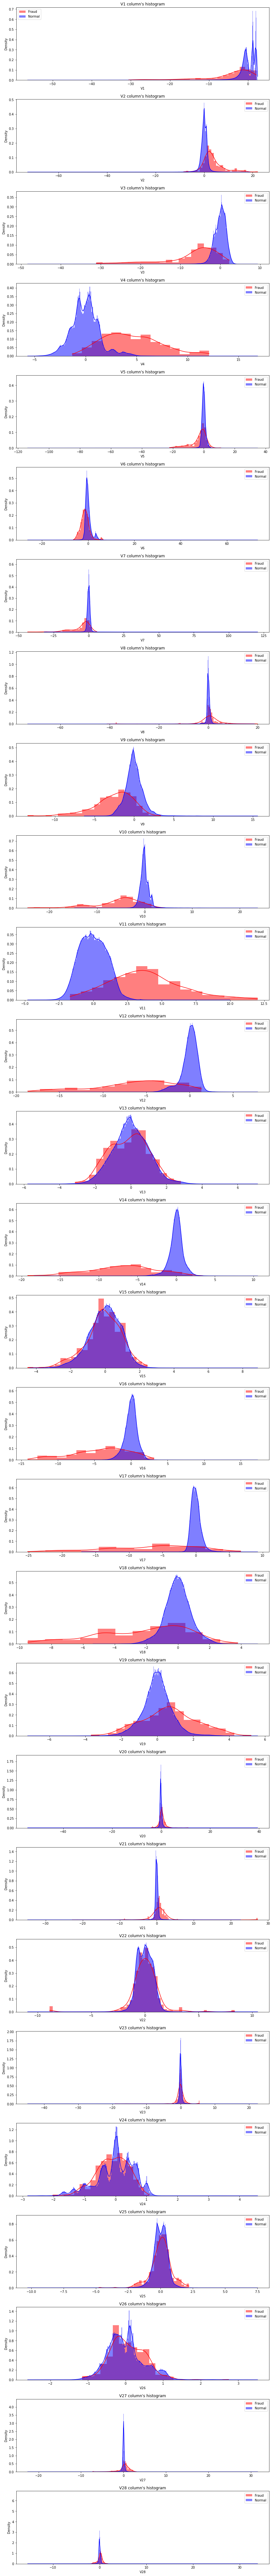

In [20]:
nrows=7
ncols=4
plt.figure(figsize=(12,28*4))
grid_spec = plt.GridSpec(28, 1)

for i, name  in enumerate(v_values):
  ax = plt.subplot(grid_spec[i])
  sns.histplot(data[name][data.Class == 1 ], kde = True, stat = 'density', linewidth=0, color= 'r', label='Fraud')
  sns.histplot(data[name][data.Class == 0 ], kde = True, stat = 'density', linewidth=0, color= 'b', label='Normal')
  ax.set(title = name + " column's histogram")
  ax.legend()

plt.tight_layout(pad=1.30)
plt.show()

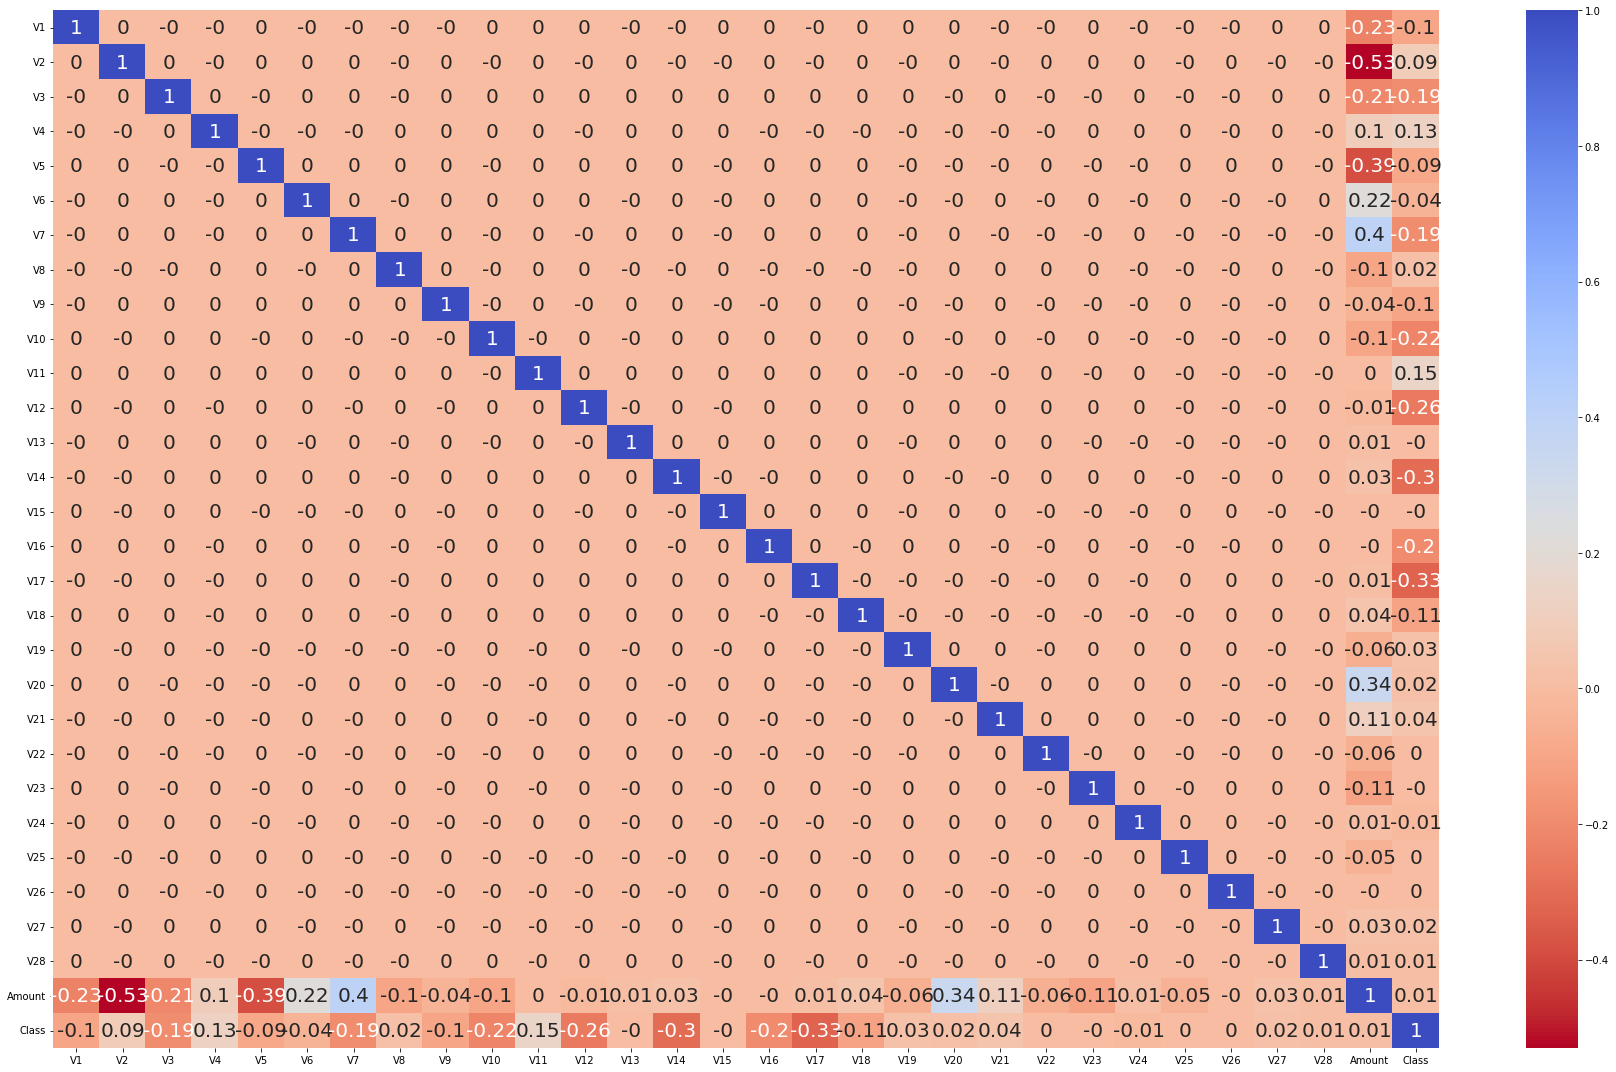

In [21]:

# let's look at the correlations between V columns

cor = data.corr().round(2)
plt.figure(figsize =(25, 15))
sns.heatmap(cor, cmap='coolwarm_r', annot_kws={'size':20}, annot=True)
plt.tight_layout()

### As ve can see above, there are no correlation between `V` columns

## 3. Model Training

### Splitting data into Train, test and validation

In [22]:
train_df, test_df = train_test_split(data, test_size=0.1)
train_df, val_df = train_test_split(train_df, test_size=0.1)

In [23]:
train_df.shape, test_df.shape, val_df.shape

((230693, 30), (28481, 30), (25633, 30))

In [24]:
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
207246,2.003057,0.129245,-1.504922,0.539262,0.200003,-1.077569,0.211533,-0.255958,0.431870,-0.398726,...,-0.314948,-0.822113,0.394729,0.997669,-0.340651,0.143291,-0.060505,-0.023049,-0.289260,0
203912,1.892522,-1.058925,-2.457965,-0.557249,0.267261,-0.455233,0.364172,-0.355111,-1.143043,1.041147,...,-0.146791,-0.219826,-0.145691,0.251940,0.239317,0.789083,-0.138648,-0.059018,0.375662,0
41841,1.106819,-0.128631,1.030015,1.602752,-0.402357,0.898101,-0.483580,0.268529,1.164937,-0.441211,...,-0.436421,-0.747419,0.008949,-0.409388,0.517276,-0.481310,0.095117,0.026040,-0.293258,0
108205,-1.170877,0.611952,1.316002,-0.540847,0.826980,-0.759575,0.787369,-0.196287,-0.237859,-0.091344,...,-0.286622,-0.549604,0.165393,-0.065645,-0.257239,-0.102817,-0.046228,-0.064369,-0.349671,0
283420,-0.764341,1.613164,-3.470917,-1.485998,2.713902,3.893024,-1.932338,-4.113411,-1.117885,-1.526347,...,-2.264569,1.410412,0.422336,0.729307,-0.422180,0.534992,-0.216819,-0.011295,-0.350191,0


In [26]:
# Let's clearify model's X and Y values
train_df, train_labels = train_df.iloc[:, :-1], train_df.Class
test_df, test_labels = test_df.iloc[:, :-1], test_df.Class
val_df, val_labels = val_df.iloc[:, :-1], val_df.Class

In [27]:
print(f" train dataset distribution: \n {train_labels.value_counts()}, \n  test dataset distribution \n  {test_labels.value_counts()},\n  val dataset distribution \n  {val_labels.value_counts()} \n 0: Normal transaction \n 1: Fraud transaction")

 train dataset distribution: 
 0    230295
1       398
Name: Class, dtype: int64, 
  test dataset distribution 
  0    28435
1       46
Name: Class, dtype: int64,
  val dataset distribution 
  0    25585
1       48
Name: Class, dtype: int64 
 0: Normal transaction 
 1: Fraud transaction


In [28]:
# Let's clearify the metrics for model evaluation
metrics = [
    tf.keras.metrics.FalseNegatives(name="FN"),
    tf.keras.metrics.FalsePositives(name="FP"),
    tf.keras.metrics.Recall(name="recall_score"),
    tf.keras.metrics.Precision(name= "Precision_score"),
    tf.keras.metrics.AUC(name="AUC"),
    tf.keras.metrics.BinaryAccuracy(name = "binary_accuracy"),
    tf.keras.metrics.AUC(name='prc', curve='PR') # precision-recall curve
]

In [29]:
# callback
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_prc', 
                                                      verbose=1,
                                                      patience=10,
                                                      mode='max',
                                                      restore_best_weights=True)

In [30]:
BATCH_SIZE = 1024
TRAIN_SHAPE = train_df.shape[-1]
TRAIN_SHAPE

29

In [ ]:
# Functional API 

def model_kur(metrics = metrics):
  inputs = tf.keras.Input(shape = TRAIN_SHAPE, name = "input_layer")
  x = tf.keras.layers.Dense(32)(inputs)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.LeakyReLU()(x)
  
  x = tf.keras.layers.Dense(32)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.LeakyReLU()(x)

  x = tf.keras.layers.Dense(8)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.LeakyReLU()(x)
  
  outputs = tf.keras.layers.Dense(1, activation="sigmoid", name = "output_layer")(x)

  model = tf.keras.models.Model(inputs, outputs)

  model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = metrics)
  return model


In [ ]:
model = model_kur()

In [ ]:
model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 29)]              0         
                                                                 
 dense_32 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_30 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_31 (Bat  (None, 32)               128       
 chNormalization)                                         

In [ ]:
model_hist = model.fit(x=train_df,
                       y=train_labels,
                       batch_size=BATCH_SIZE,
                       validation_data=(val_df, val_labels),
                       callbacks = [early_stop_callback],
                       epochs = 100
                       )

Epoch 1/100
226/226 [==============================] - 5s 10ms/step - loss: 0.4080 - FN: 185.0000 - FP: 18475.0000 - recall_score: 0.5795 - Precision_score: 0.0136 - AUC: 0.7596 - binary_accuracy: 0.9272 - prc: 0.2195 - val_loss: 0.2460 - val_FN: 14.0000 - val_FP: 10.0000 - val_recall_score: 0.7455 - val_Precision_score: 0.8039 - val_AUC: 0.8876 - val_binary_accuracy: 0.9991 - val_prc: 0.6615
Epoch 2/100
226/226 [==============================] - 1s 5ms/step - loss: 0.1296 - FN: 98.0000 - FP: 56.0000 - recall_score: 0.7455 - Precision_score: 0.8367 - AUC: 0.9175 - binary_accuracy: 0.9993 - prc: 0.6841 - val_loss: 0.0749 - val_FN: 14.0000 - val_FP: 7.0000 - val_recall_score: 0.7455 - val_Precision_score: 0.8542 - val_AUC: 0.9343 - val_binary_accuracy: 0.9992 - val_prc: 0.6892
Epoch 3/100
226/226 [==============================] - 1s 5ms/step - loss: 0.0546 - FN: 95.0000 - FP: 45.0000 - recall_score: 0.7532 - Precision_score: 0.8657 - AUC: 0.9378 - binary_accuracy: 0.9994 - prc: 0.6988 -

In [ ]:
model.evaluate(val_df, val_labels)

802/802 [==============================] - 2s 2ms/step - loss: 0.0042 - FN: 12.0000 - FP: 6.0000 - recall_score: 0.7818 - Precision_score: 0.8776 - AUC: 0.9540 - binary_accuracy: 0.9993 - prc: 0.8458


[0.004203877877444029,
 12.0,
 6.0,
 0.7818182110786438,
 0.8775510191917419,
 0.9540436863899231,
 0.9992977976799011,
 0.8457822203636169]

In [ ]:
model_pred = model.predict(test_df)

In [ ]:
# real values
test_labels

150172    0
201730    0
245077    0
7194      0
206167    0
         ..
238546    0
138739    0
273696    0
163877    0
48909     0
Name: Class, Length: 28481, dtype: int64

In [ ]:
nrows=3
ncols=3
def plot_confusion_matrix(y_true, y_pred):
  threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
  plt.figure(figsize = (15, 15))
  label = ['Normal', 'Fraud']
  for i in range(0, len(threshold)):
    ax = plt.subplot(nrows, ncols, i+1)
    cm = confusion_matrix(y_true= y_true,
                          y_pred= y_pred > threshold[i])
    sns.heatmap(cm, annot=True, fmt="d")

    ax.set()
    ax.set(ylabel= 'Actual label',
           xlabel = 'Predicted label',
           title = 'Confusion matrix Threshold:  {:.2f}'.format(threshold[i]),
            
           xticklabels=label, # axes will labeled with class names (if they exist) or ints
           yticklabels=label)
  plt.tight_layout()
  plt.show()
  

  

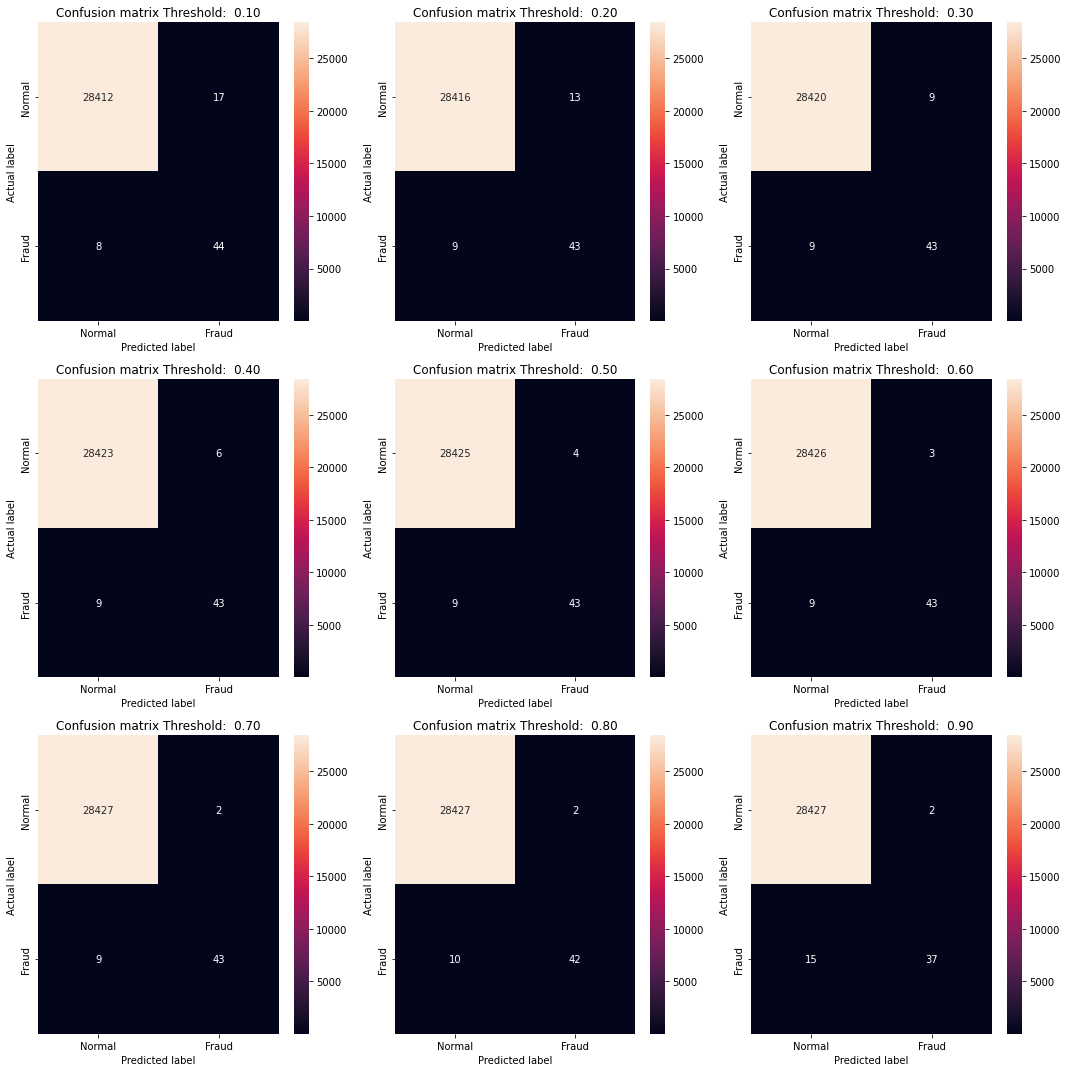

In [ ]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred=model_pred)

In [ ]:
# let's see roc curve
def plot_roc(name, y_true, y_pred):
  plt.figure(figsize = (7, 7))
  fp, tp, _ = roc_curve(y_true= y_true,
                        y_score=y_pred)
  plt.plot(100*fp, 100*tp, linewidth=2)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
  plt.title(name)

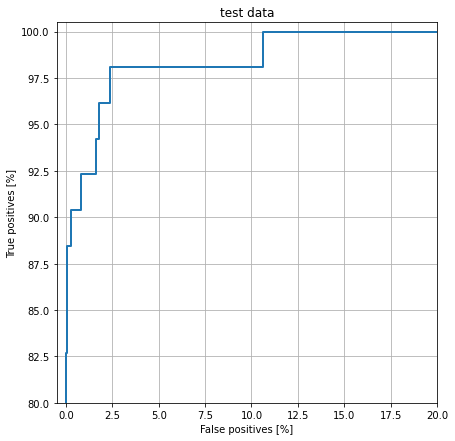

In [ ]:
plot_roc(name = "test data",
         y_true = test_labels,
         y_pred = model_pred)

In [ ]:
# let's see prc

def plot_prc(name, y_true, y_pred):
  plt.figure(figsize = (7, 7))
  precision, recall, _ = precision_recall_curve(y_true=y_true,
                                                probas_pred=y_pred)
  plt.plot(precision, recall, linewidth=2)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
  plt.title(name)

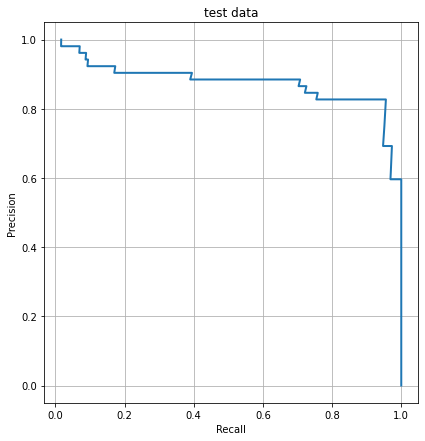

In [ ]:
plot_prc(name = "test data",
         y_true = test_labels,
         y_pred = model_pred)

### Since the model is highly unstable let's balance the inputs of the boundary again using class_weights

In [ ]:
np.unique(train_labels.ravel())

array([0, 1])

In [ ]:

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_labels.ravel()),
                                        y = train_labels.ravel()                                                  
                                    )
class_weights = dict(zip(np.unique(train_labels.ravel()), class_weights))
class_weights

{0: 0.5008358372266704, 1: 299.6012987012987}

In [ ]:
weighted_model = model_kur()

In [ ]:
weighted_model_hist = weighted_model.fit(train_df,
                                         train_labels,
                                         epochs =100,
                                         validation_data = (val_df, val_labels),
                                         class_weight = class_weights,
                                         callbacks = [early_stop_callback],
                                         batch_size = BATCH_SIZE)

Epoch 1/100
226/226 [==============================] - 5s 11ms/step - loss: 0.3768 - FN: 38.0000 - FP: 62565.0000 - recall_score: 0.9136 - Precision_score: 0.0064 - AUC: 0.9389 - binary_accuracy: 0.7558 - prc: 0.4868 - val_loss: 0.4709 - val_FN: 5.0000 - val_FP: 2125.0000 - val_recall_score: 0.9091 - val_Precision_score: 0.0230 - val_AUC: 0.9622 - val_binary_accuracy: 0.9169 - val_prc: 0.6340
Epoch 2/100
226/226 [==============================] - 1s 6ms/step - loss: 0.2369 - FN: 29.0000 - FP: 13592.0000 - recall_score: 0.9247 - Precision_score: 0.0255 - AUC: 0.9817 - binary_accuracy: 0.9410 - prc: 0.6796 - val_loss: 0.2556 - val_FN: 7.0000 - val_FP: 534.0000 - val_recall_score: 0.8727 - val_Precision_score: 0.0825 - val_AUC: 0.9712 - val_binary_accuracy: 0.9789 - val_prc: 0.7177
Epoch 3/100
226/226 [==============================] - 1s 6ms/step - loss: 0.1735 - FN: 33.0000 - FP: 6721.0000 - recall_score: 0.9143 - Precision_score: 0.0498 - AUC: 0.9852 - binary_accuracy: 0.9707 - prc: 0.

In [ ]:
weighted_model.evaluate(val_df, val_labels)

802/802 [==============================] - 2s 2ms/step - loss: 0.2556 - FN: 7.0000 - FP: 534.0000 - recall_score: 0.8727 - Precision_score: 0.0825 - AUC: 0.9712 - binary_accuracy: 0.9789 - prc: 0.7177


[0.2555594742298126,
 7.0,
 534.0,
 0.8727272748947144,
 0.0824742242693901,
 0.9711741805076599,
 0.9788944125175476,
 0.7177028059959412]

In [ ]:
weighted_model_preds = weighted_model.predict(test_df)

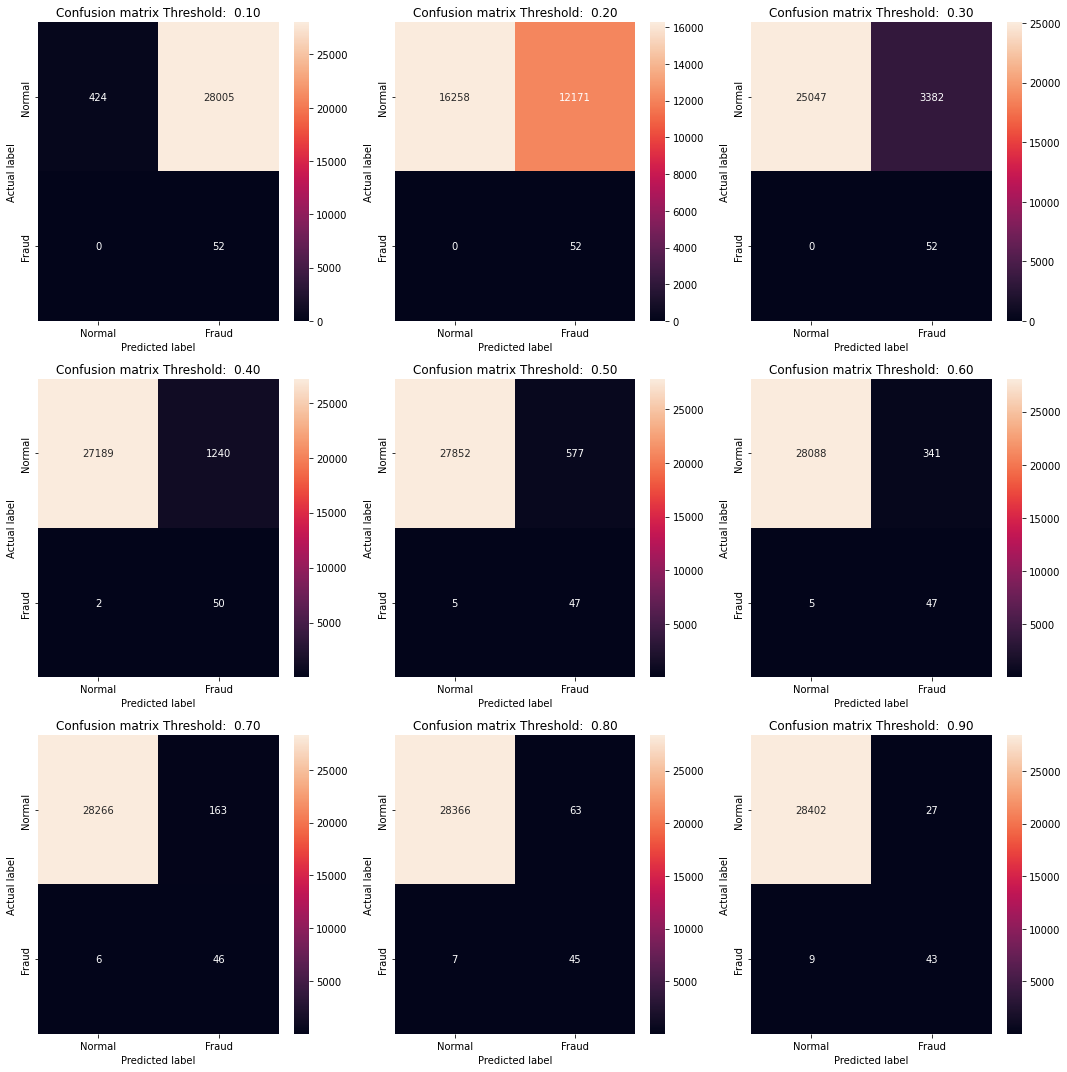

In [ ]:
plot_confusion_matrix(y_true = test_labels,
                      y_pred = weighted_model_preds)

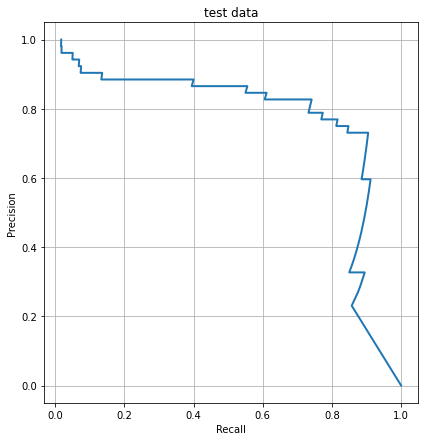

In [ ]:
plot_prc(name = "test data",
         y_true = test_labels,
         y_pred = weighted_model_preds)

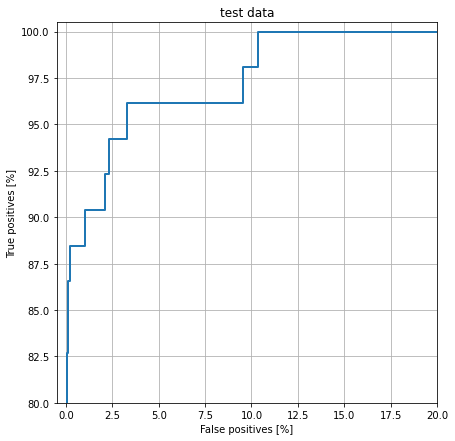

In [ ]:
plot_roc(name = "test data",
         y_true = test_labels,
         y_pred = weighted_model_preds)

### Modelin Başarımı Arrttırılması adına OverSampling veya UnderSampling


> *Over Sampling*

OverSampling generates synthetic data from the minority class until the class distributions are equal. In this method, since synthetic data is produced with the samples of the minority class, the probability of the model being overfitting is high. also, oversampling can be computationally very costly if the dataset has a highly uneven distribution.





> *Under Sampling* 

Under Sampling aims to rebalance the dataset by removing instances from the class with more instances so that the class distributions are even. One of the disadvantages of this method is that it removes observations that may contribute to projects with insufficient number of observations from the data set.

#### Over Sampling

In [ ]:
over_sampler = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 'minority', random_state=42) # sadece azinlik siniftan turet

In [ ]:
train_df_over, train_labels_over = over_sampler.fit_resample(train_df, train_labels)

In [ ]:
print(f" oversampling yapilmis data {train_df_over.shape}")
print(f" oversampling yapilmis data label {train_labels_over.shape}")

 oversampling yapilmis data (460616, 29)
 oversampling yapilmis data label (460616,)


In [ ]:
train_labels_over.value_counts()

1    230308
0    230308
Name: Class, dtype: int64

In [ ]:
over_model = model_kur()

In [ ]:
over_model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 29)]              0         
                                                                 
 dense_38 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_36 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_38 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_37 (Bat  (None, 32)               128       
 chNormalization)                                         

In [ ]:
over_model_hist = over_model.fit(train_df_over,
                                train_labels_over,                                
                                epochs =100,
                                validation_data = (val_df, val_labels),
                                callbacks = [early_stop_callback],
                                batch_size = BATCH_SIZE)

Epoch 1/100
450/450 [==============================] - 6s 8ms/step - loss: 0.1836 - FN: 20670.0000 - FP: 5550.0000 - recall_score: 0.9103 - Precision_score: 0.9742 - AUC: 0.9830 - binary_accuracy: 0.9461 - prc: 0.9848 - val_loss: 0.1589 - val_FN: 8.0000 - val_FP: 680.0000 - val_recall_score: 0.8545 - val_Precision_score: 0.0646 - val_AUC: 0.9675 - val_binary_accuracy: 0.9732 - val_prc: 0.7198
Epoch 2/100
450/450 [==============================] - 2s 5ms/step - loss: 0.0572 - FN: 4522.0000 - FP: 3299.0000 - recall_score: 0.9804 - Precision_score: 0.9856 - AUC: 0.9987 - binary_accuracy: 0.9830 - prc: 0.9986 - val_loss: 0.0287 - val_FN: 9.0000 - val_FP: 150.0000 - val_recall_score: 0.8364 - val_Precision_score: 0.2347 - val_AUC: 0.9625 - val_binary_accuracy: 0.9938 - val_prc: 0.6517
Epoch 3/100
450/450 [==============================] - 2s 5ms/step - loss: 0.0264 - FN: 813.0000 - FP: 2018.0000 - recall_score: 0.9965 - Precision_score: 0.9913 - AUC: 0.9995 - binary_accuracy: 0.9939 - prc: 

In [ ]:
over_model.evaluate(val_df, val_labels)

802/802 [==============================] - 2s 2ms/step - loss: 0.1589 - FN: 8.0000 - FP: 680.0000 - recall_score: 0.8545 - Precision_score: 0.0646 - AUC: 0.9675 - binary_accuracy: 0.9732 - prc: 0.7198


[0.15890100598335266,
 8.0,
 680.0,
 0.8545454740524292,
 0.06464924663305283,
 0.9674674272537231,
 0.9731596112251282,
 0.7197532653808594]

In [ ]:
over_model_preds = over_model.predict(test_df)

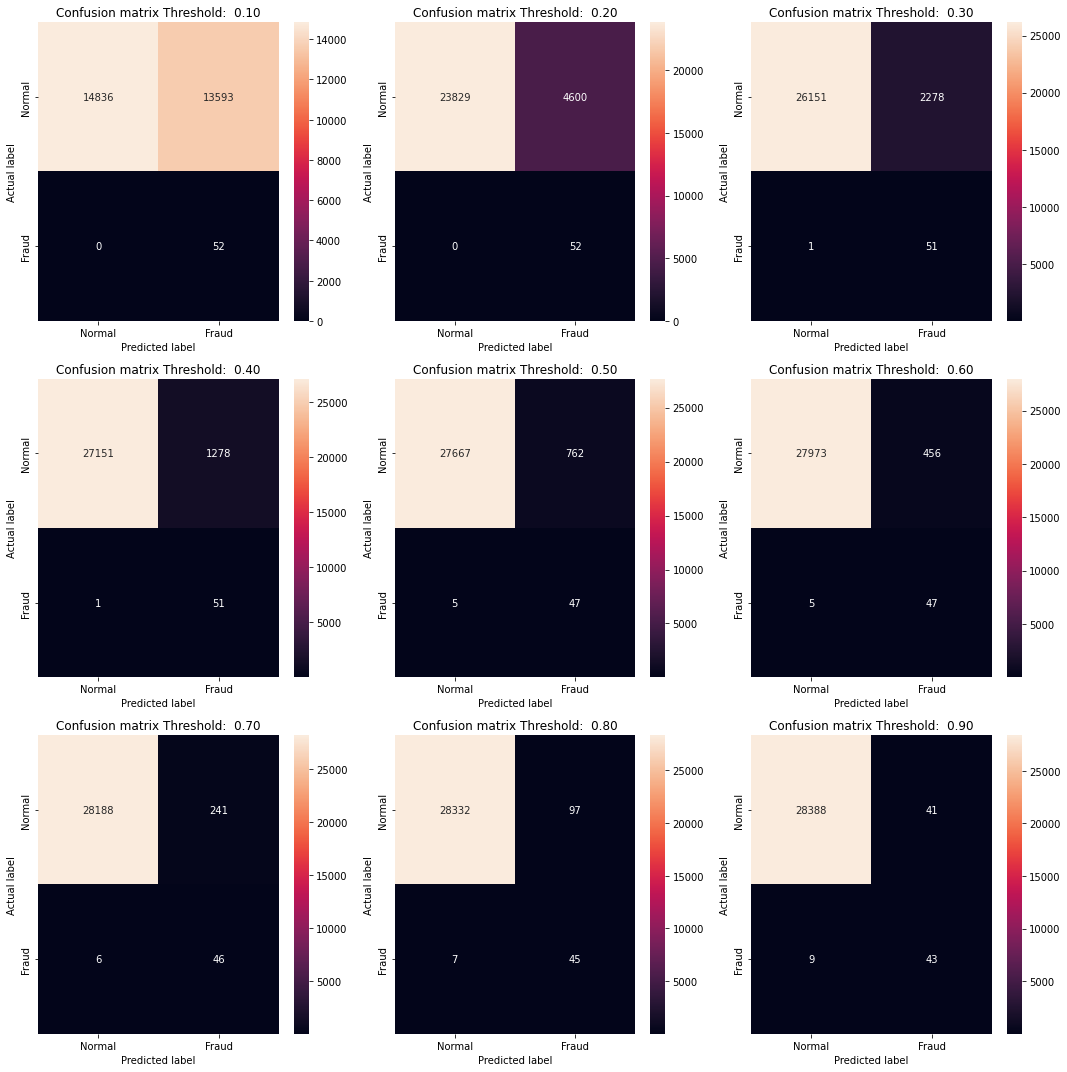

In [ ]:
plot_confusion_matrix(y_true = test_labels,
                      y_pred = over_model_preds)

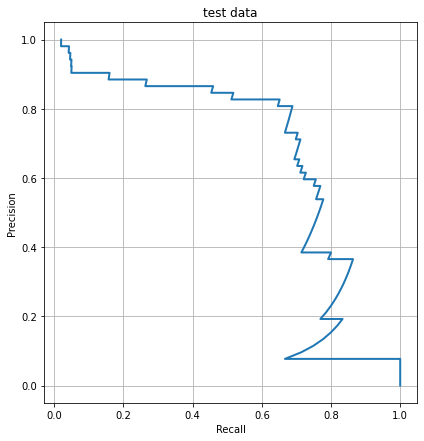

In [ ]:
plot_prc(name = "test data",
         y_true = test_labels,
         y_pred = over_model_preds)

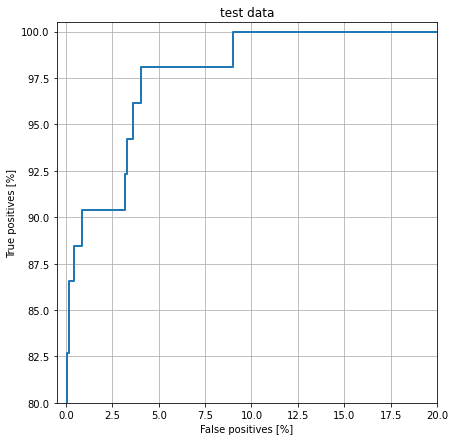

In [ ]:
plot_roc(name = "test data",
         y_true = test_labels,
         y_pred = over_model_preds)

#####  let's update class weights for oversampling data

In [ ]:
class_weights_over = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_labels_over.ravel()),
                                        y = train_labels_over.ravel()                                                  
                                    )
class_weights_over = dict(zip(np.unique(train_labels_over.ravel()), class_weights_over))
class_weights_over

{0: 1.0, 1: 1.0}

In [ ]:
# modeli bir daha egitelim

In [ ]:
over_model_weighted = model_kur()

In [ ]:
over_model_weighted.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 29)]              0         
                                                                 
 dense_41 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_39 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_40 (Bat  (None, 32)               128       
 chNormalization)                                         

In [ ]:
weighted_over_model_hist = over_model_weighted.fit(train_df_over,
                                                  train_labels_over,                                
                                                  epochs =100,
                                                  validation_data = (val_df, val_labels),
                                                  callbacks = [early_stop_callback],
                                                  class_weight = class_weights_over,
                                                  batch_size = BATCH_SIZE)

Epoch 1/100
450/450 [==============================] - 6s 8ms/step - loss: 0.1576 - FN: 18749.0000 - FP: 5693.0000 - recall_score: 0.9186 - Precision_score: 0.9738 - AUC: 0.9849 - binary_accuracy: 0.9497 - prc: 0.9871 - val_loss: 0.1111 - val_FN: 6.0000 - val_FP: 526.0000 - val_recall_score: 0.8909 - val_Precision_score: 0.0852 - val_AUC: 0.9729 - val_binary_accuracy: 0.9792 - val_prc: 0.7158
Epoch 2/100
450/450 [==============================] - 2s 6ms/step - loss: 0.0629 - FN: 6006.0000 - FP: 3110.0000 - recall_score: 0.9739 - Precision_score: 0.9863 - AUC: 0.9978 - binary_accuracy: 0.9802 - prc: 0.9978 - val_loss: 0.0368 - val_FN: 11.0000 - val_FP: 160.0000 - val_recall_score: 0.8000 - val_Precision_score: 0.2157 - val_AUC: 0.9655 - val_binary_accuracy: 0.9933 - val_prc: 0.6273
Epoch 3/100
450/450 [==============================] - 3s 6ms/step - loss: 0.0290 - FN: 1696.0000 - FP: 1976.0000 - recall_score: 0.9926 - Precision_score: 0.9914 - AUC: 0.9995 - binary_accuracy: 0.9920 - prc

In [ ]:
over_model_weighted.evaluate(val_df, val_labels)

802/802 [==============================] - 2s 2ms/step - loss: 0.1111 - FN: 6.0000 - FP: 526.0000 - recall_score: 0.8909 - Precision_score: 0.0852 - AUC: 0.9729 - binary_accuracy: 0.9792 - prc: 0.7158


[0.11105559021234512,
 6.0,
 526.0,
 0.8909090757369995,
 0.08521739393472672,
 0.9729263186454773,
 0.9792454838752747,
 0.7158412337303162]

In [ ]:
over_model_weighted_preds = over_model_weighted.predict(test_df)

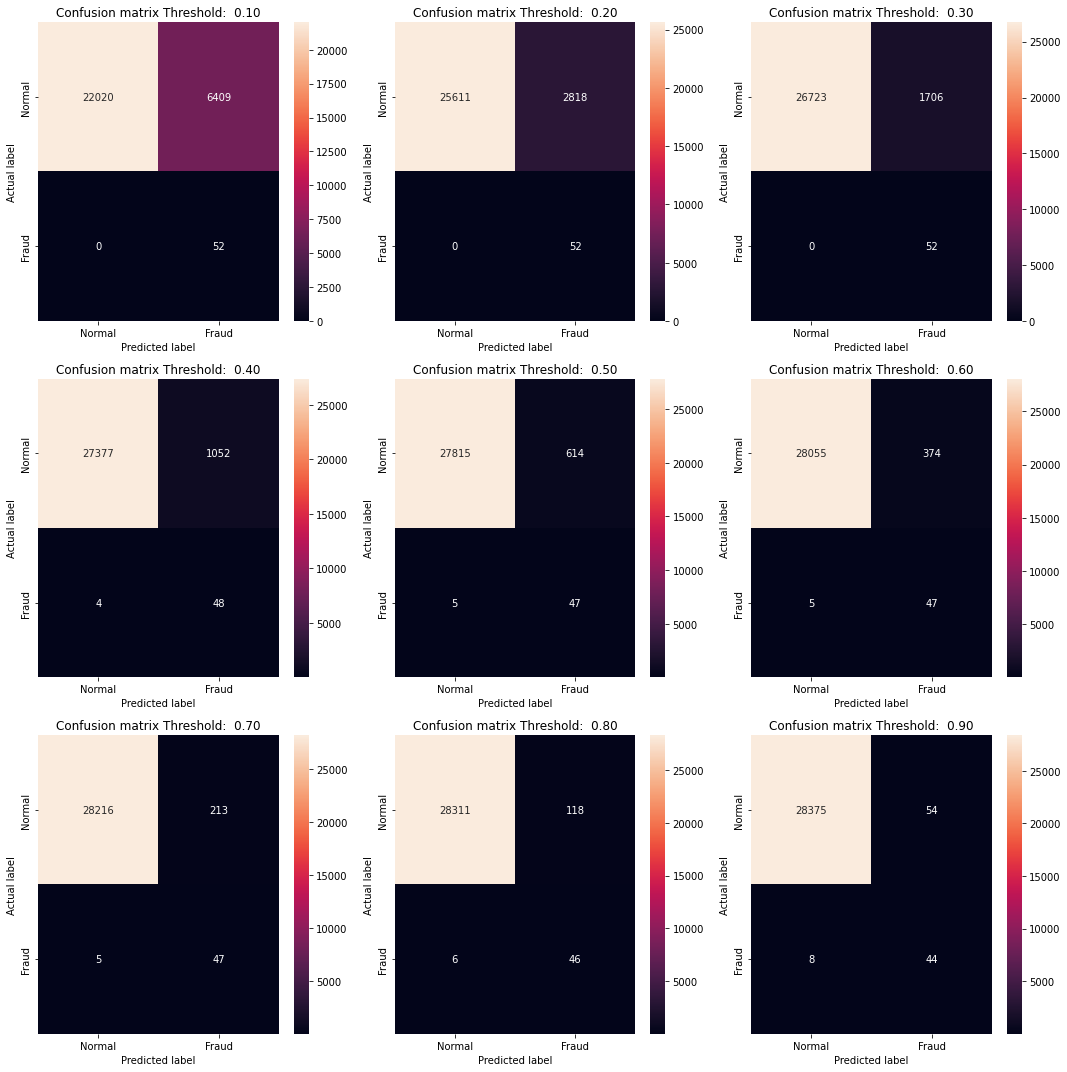

In [ ]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= over_model_weighted_preds)

#### Under Sampling

In [ ]:
under_sampler = imblearn.under_sampling.RandomUnderSampler(sampling_strategy= 0.02, random_state=0) # sadece azinlik siniftan turet

In [ ]:
train_df_under, train_labels_under = under_sampler.fit_resample(train_df, train_labels)

In [ ]:
print(f" undersampling yapilmis data {train_df_under.shape}")
print(f" undersampling yapilmis data label {train_labels_under.shape}")

 undersampling yapilmis data (19635, 29)
 undersampling yapilmis data label (19635,)


In [ ]:
train_labels_under.value_counts()

0    19250
1      385
Name: Class, dtype: int64

In [ ]:
under_model = model_kur()

In [ ]:
under_model.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 29)]              0         
                                                                 
 dense_56 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_54 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 32)                0         
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_55 (Bat  (None, 32)               128       
 chNormalization)                                         

In [ ]:
under_model_hist = under_model.fit(train_df_under,
                                train_labels_under,                                
                                epochs =100,
                                validation_data = (val_df, val_labels),
                                callbacks = [early_stop_callback])

Epoch 1/100
614/614 [==============================] - 8s 7ms/step - loss: 0.1909 - FN: 82.0000 - FP: 1042.0000 - recall_score: 0.8136 - Precision_score: 0.2557 - AUC: 0.9467 - binary_accuracy: 0.9752 - prc: 0.6451 - val_loss: 0.0354 - val_FN: 14.0000 - val_FP: 12.0000 - val_recall_score: 0.7455 - val_Precision_score: 0.7736 - val_AUC: 0.9508 - val_binary_accuracy: 0.9990 - val_prc: 0.6764
Epoch 2/100
614/614 [==============================] - 3s 5ms/step - loss: 0.0324 - FN: 76.0000 - FP: 12.0000 - recall_score: 0.8026 - Precision_score: 0.9626 - AUC: 0.9603 - binary_accuracy: 0.9955 - prc: 0.8706 - val_loss: 0.0124 - val_FN: 11.0000 - val_FP: 17.0000 - val_recall_score: 0.8000 - val_Precision_score: 0.7213 - val_AUC: 0.9494 - val_binary_accuracy: 0.9989 - val_prc: 0.7107
Epoch 3/100
614/614 [==============================] - 3s 5ms/step - loss: 0.0221 - FN: 71.0000 - FP: 13.0000 - recall_score: 0.8156 - Precision_score: 0.9602 - AUC: 0.9757 - binary_accuracy: 0.9957 - prc: 0.8891 - v

In [ ]:
under_model.evaluate(val_df, val_labels)

802/802 [==============================] - 2s 2ms/step - loss: 0.0069 - FN: 10.0000 - FP: 21.0000 - recall_score: 0.8182 - Precision_score: 0.6818 - AUC: 0.9689 - binary_accuracy: 0.9988 - prc: 0.7605


[0.006902094930410385,
 10.0,
 21.0,
 0.8181818127632141,
 0.6818181872367859,
 0.9688969850540161,
 0.9987906217575073,
 0.7604606747627258]

In [ ]:
under_model_preds = under_model.predict(test_df)

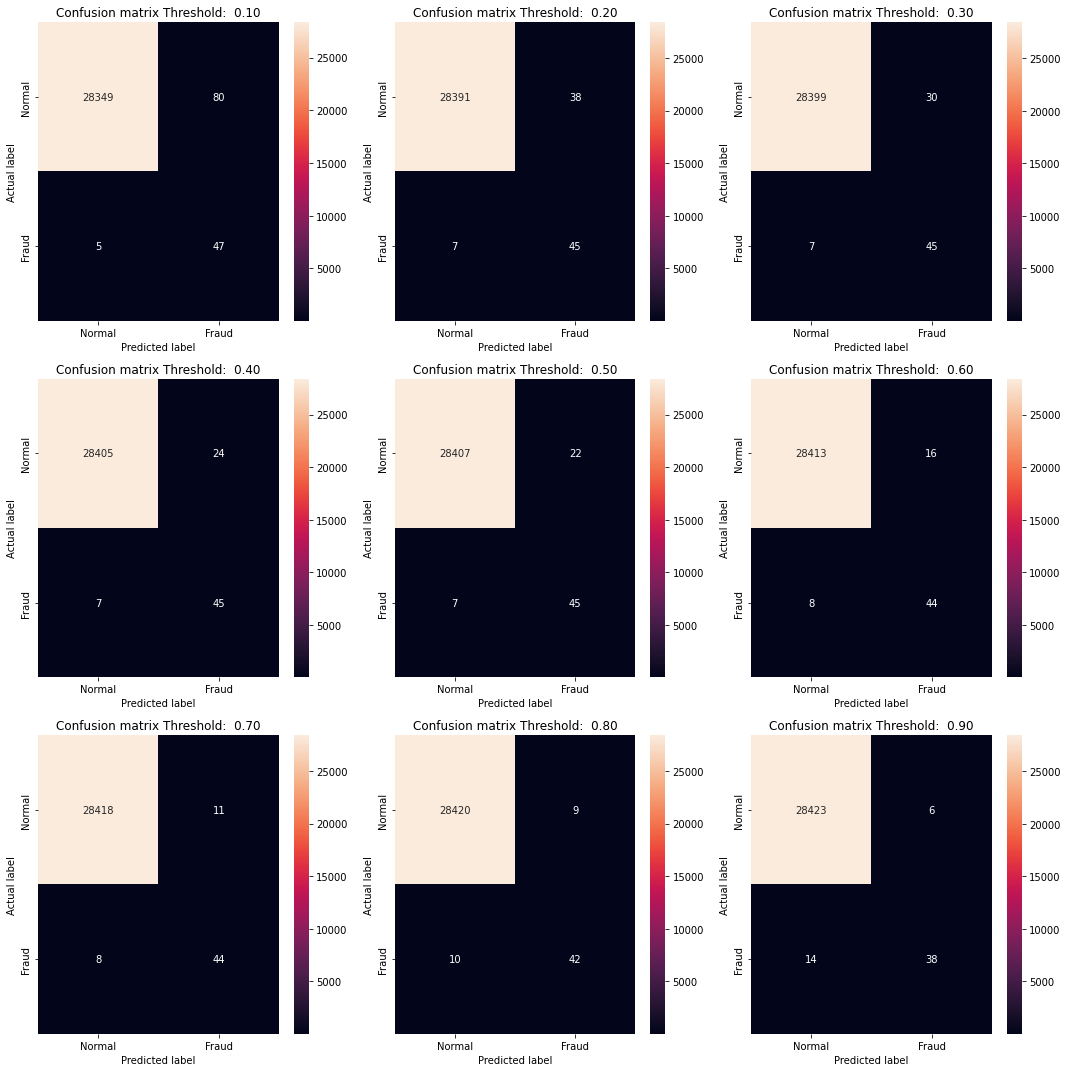

In [ ]:
plot_confusion_matrix(y_true = test_labels,
                      y_pred = under_model_preds)